<a href="https://colab.research.google.com/github/Caloca24/Pycaret_Udemy_Course/blob/main/Topic_modelPyCaretNLPFinancialnews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyCaret NLP

PyCaret is a low code machine learning library, developed by Moez Ali. The first version was released in 2020.

The PyCaret NLP Module contains the following models.
Models available in the model library include:

1. ‘lda’ - Latent Dirichlet Allocation

2. ‘lsi’ - Latent Semantic Indexing

3. ‘hdp’ - Hierarchical Dirichlet Process

4. ‘rp’ - Random Projections

5. ‘nmf’ - Non-Negative Matrix Factorization

In [10]:
#install pycaret
!pip install -U --pre pycaret

In [1]:
#import spacy
import spacy
#load en_core_web_sm
nlp = spacy.load("en_core_web_sm")

#Enable interactive visuals on Google Colab

In [ ]:
#import enable_colab
from pycaret.utils import enable_colab
enable_colab()

In [2]:
from google.colab import files
uploaded = files.upload()


Saving FinancialNewsDataset.csv to FinancialNewsDataset.csv


In [5]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['FinancialNewsDataset.csv']),  encoding='latin-1',  names=["Rating", "Headline"])
df.head(10)

,Rating,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
5,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
6,positive,"For the last quarter of 2010 , Componenta 's n..."
7,positive,"In the third quarter of 2010 , net sales incre..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn , up fro..."


In [6]:
#get the size of the dataset
df.shape

(4846, 2)

In [7]:
#get the values in each category
df.Rating.value_counts()

,count
Rating,
neutral,2879
positive,1363
negative,604


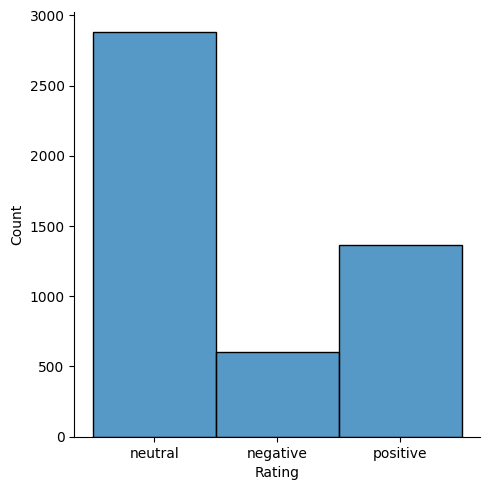

In [8]:
import seaborn as sns
sns.displot(df['Rating'], discrete=True)

En_core_web_sm is an available pipeline in spacy derived from news articles, blogs etc. In case you're wondering SM refers to the size of the model.

#Pycaret NLP Workflow
1. Download the dataset and necessary modules from spacy
2. Use the setup function for preprocessing
3. Create the model - in this case, an LDA model
4. Assign the topics
5. Plot the model
6. Evaluate the model

#The setup() function in Pycaret for NLP
1. Removing numeric characters, and replaced with blanks
2. Removed special characters
3. Tokenization - where text is broken down into words
4. Removal of stopwords: these words provide little valuable information since they are too commonly used (like 'a', 'the', 'in')
Also note that we can add Custom stopwords: where you can add words specific to the text like 'data', 'data science' etc for a text on data science
6. Bigram extraction: "A bigram is a sequence of two adjacent elements from a string of tokens" Example "tax breaks"
7. Lemmatization: Groups together inflected words - 'dance' is the lemma for the word dancing, dancers, dancer, danced etc.

In [11]:
#import all the functions from pycaret.nlp
from pycaret.nlp import *
#custom words
#note the verbs
#note the common nouns common to articles about companies, products and services
finnews_dataset = setup(data = df, target = 'Headline', session_id = 200,  custom_stopwords = ['company', 'product', 'service', 'income', 'also', 'make', 'business', 'buy',
                                       'sell', 'purchase','year', 'people', 'able', 'enable', 'small', 'revenue', 'projection', 'include', 'user',
                                        'store', 'website', 'use', 'first', 'large', 'would', 'become', 'provide', 'begin', 'operation', 'state', 'open',
                                       'group', 'corporate', 'pay', 'plan', 'design', 'world', 'build', 'produce', 'call', 'share', 'early', 'many', 'major', 'form', 'know', 'number', 'several',
                                        'name', 'may', 'later', 'announce', 'customer', 'line', 'give',
                                        'system', 'remain', 'stock', 'say', 'image', 'find', 'come', 'add',
                                        'relate', 'introduce', 'allow', 'light', 'release', 'locate', 'well', 'part',
                                        'need', 'serve', 'primarily', 'end', 'consumer', 'receive', 'launch', 'lead', 'center', 'hold',
                                        'develop', 'support', 'create', 'drive', 'see', 'found', 'run', 'focus', 'good', 'top', 'complete', 'former', 'addition', 'unit', 'market', 'work', 'access', 'order', 'day', 'see',
                                         'follow', 'reach', 'develop', 'formerly', 'report', 'take', 'file', 'new', 'take', 'city',
                                         'see', 'result', 'claim', 'deal', 'start', 'continue', 'grow', 'application', 'publish', 'low',
                                          'approximately', 'total', 'annual', 'project', 'bring', 'maximum', 'temporarily', 'move', 'next', 'price',
                                          'production', 'percent', 'plant', 'agreement', 'sign', 'development', 'process', 'decrease', 'country',
                                           'disclose', 'cut', 'office', 'solution', 'subsidiary', 'level', 'site', 'offer', 'fund',
                                           'current', 'chain', 'cover', 'firm', 'employ', 'divided', 'quality', 'rise', 'close', 'change', 'test', 'operator', 'sector',
                                            'different', 'handle', 'measure', 'side', 'generate', 'expect', 'test', 'strong', 'competitive', 'recently', 'owner', 'home',
                                             'improve', 'back', 'operate', 'profit', 'operating', 'earlier', 'last', 'corresponding', 'represent', 'medium',
                                              'demand', 'represent', 'position', 'demand',
                                              'record', 'effect', 'earlier', 'last', 'target', 'strategy', 'significant', 'information',
                                            'target', 'content', 'activity', 'quarter', 'shareholder', 'net', 'period', 'client', 'decline', 'compare',
                                             'structure', 'award', 'yesterday', 'lower', 'route', 'player', 'dollar', 'usd', 'base', 'accord', 'estimate', 'aim',
                                              'cost', 'volume', 'delivery', 'account', 'term', 'due', 'base', 'experience', 'international', 'stake', 'enter', 'invest',
                                              'agree', 'government', 'division', 'investment', 'eur', 'control', 'capital', 'compare', 'period', 'manage', 'extend', 'full',
                                               'point', 'team', 'ago', 'saving',
                                           'positive', 'mid', 'look', 'high', 'job', 'combine', 'staff', 'tell', 'however', 'second', 'set', 'sale', 'reduce',
                                            'contract', 'increase', 'network', 'growth', 'decision', 'concern', 'performance', 'industry', 'price', 'management',
                                            'expand', 'issue', 'today', 'acquire', 'program', 'transfer', 'area', 'employee', 'raise', 'pct', 'strengthen', 'choose',
                                            'carry', 'nearly', 'involve', 'available', 'however', 'deliver', 'however', 'already', 'choose', 'establish', 'month', 'link', 'research'
                                        ])

ModuleNotFoundError: No module named 'pycaret.nlp'

In [13]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

NameError: name 'docs' is not defined

In [18]:
embeddings = model.encode(df['Headline'])

#Create Model

LDA, or Latent Dirichlet Allocation is one of the popular topic modelling methods.


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embeddings)
df['Cluster'] = clusters

#Topic Model
A topic model helps identify abstract topics in a collection of documents.
If a document is about loans, it will contain words about credit-worthiness and interest-rates etc. It helps with identifying categories for large datasets/document collections and archives.

How does the LDA model work?
We deal with Words in Rows(documents) and specific Topics. We are interested in finding out the words which are found in Rows (which can be easily calculated). We can then find out the probability for words which are associated with specific Topics.

If a word has a high probability of being in a topic, and the word is frequently found in a row/Document, then that document belongs to that topic.

It works by dealing with two probabilities - 1. the probability of the presence of a word in a row (or a document), and 2. the probability a word is associated with a given topic.
After the model iterates over all the rows, the guesses improve iteratively since it would have concluded that certain groups of words belong together. Similarly, it would have concluded that certian groups of words which might not necessarily appear together, but do not appear alongside words belonging to loands will belong to other categories.

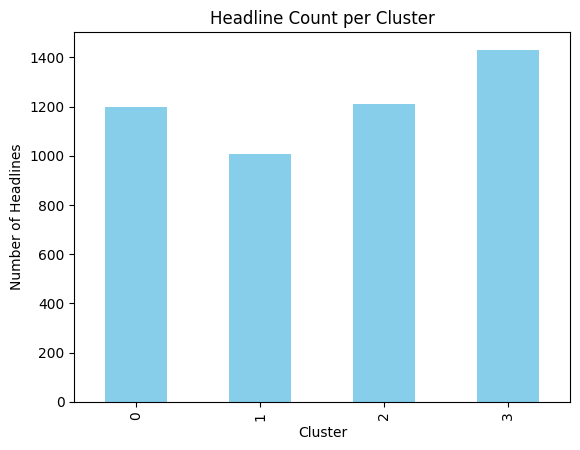

In [22]:
import matplotlib.pyplot as plt

df['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Headlines')
plt.title('Headline Count per Cluster')
plt.show()


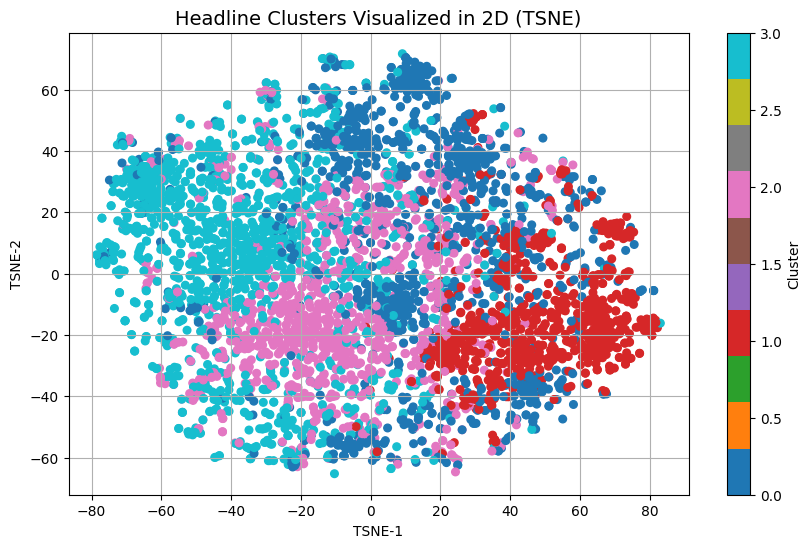

In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce 384-dim embeddings to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1],
                      c=df['Cluster'], cmap='tab10', s=30)

plt.title("Headline Clusters Visualized in 2D (TSNE)", fontsize=14)
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
e

#Assign Model
The assign_model helps to identify the right topics as determined by the lda model.

In [ ]:
lda_results = assign_model(lda)
lda_results.head()

,Rating,Headline,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,neutral,,0.262831,0.275316,0.221037,0.240816,Topic 1,0.28
1,neutral,technopoli stage less square_meter host comput...,0.139868,0.555233,0.176663,0.128236,Topic 1,0.56
2,negative,electronic elcoteq lay ten tallinn facility co...,0.175228,0.131181,0.106496,0.587096,Topic 3,0.59
3,positive,capacity meet raw_material therefore profitabi...,0.524341,0.177528,0.142577,0.155554,Topic 0,0.52
4,positive,update basware long range margin,0.453747,0.248628,0.142444,0.155181,Topic 0,0.45


Dominant_Topic  Topic 0  Topic 1  Topic 2  Topic 3
Rating                                            
negative            185      285       62       72
neutral             728     1039      443      669
positive            361      553      248      201


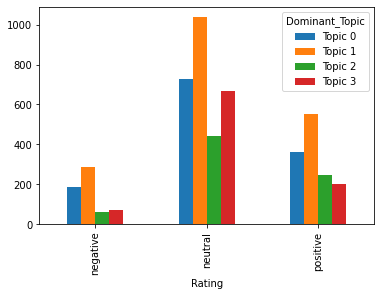

In [ ]:
cross_tab_data = pd.crosstab(lda_results['Rating'],
            lda_results['Dominant_Topic'])


print(cross_tab_data)

barplot = cross_tab_data.plot.bar()

#Plot the model

#Topic Distribution

In [ ]:
#plot a distribution plot
plot_model(lda, plot = 'topic_distribution')

In [ ]:
#plot a tsne plot
plot_model(lda, plot = 'tsne')


#A brief note on attempting to infer the Tsne plot
Why TSNE?
"The main advantage of t-SNE is the ability to preserve local structure. This means, roughly, that points which are close to one another in the high-dimensional data set will tend to be close to one another in the chart."
Source: https://www.displayr.com/using-t-sne-to-visualize-data-before-prediction/

When interpreting a TSNE Plot
https://distill.pub/2016/misread-tsne/ - it is difficult to interpret a TSNE plot.
What does TSNE do: "take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane"

While it might be tempting to comment on the TSNE plot:
1. cluster sizes in a TSNE plot mean nothing;
2. distances between clusters also means nothing;
3. It is difficult to determine what constitutes noise without examining different plots at different perplexities.

So how does one gain an interpretation around TSNE:
"A tuneable parameter, “perplexity,” which says (loosely) how to balance attention between local and global aspects of your data" and "Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.".

#Evaluate the model

In [ ]:
#evaluate the model with a Word Cloud (Topic 0)
evaluate_model(lda)
#This function displays a user interface for analyzing performance of a trained model, and it calls plot_model internally

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [ ]:
#evaluate the model with a Word Cloud (Topic 0)
evaluate_model(lda)
#This function displays a user interface for analyzing performance of a trained model, and it calls plot_model internally

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [ ]:
#evaluate the model with a Word Cloud (Topic 2)
evaluate_model(lda)
#This function displays a user interface for analyzing performance of a trained model, and it calls plot_model internally

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [ ]:
#evaluate the model with a Word Cloud (Topic 3)
evaluate_model(lda)
#This function displays a user interface for analyzing performance of a trained model, and it calls plot_model internally

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

#Evaluating Topic Coherence

*Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.*

Source: PyCaret documentation

Semantic Similarity:* Semantic similarity is a metric defined over a set of documents or terms, where the idea of distance between items is based on the likeness of their meaning or semantic content as opposed to lexicographical similarity.* Source: Wikipedia  
There are different ways to approach semantic similarity - corpus based and knowledge based methods.


In [ ]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

IntProgress(value=0, description='Processing: ', max=25)

Output()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:51:11
Status,. . . . . . . . . . . . . . . . . .,Finalizing
Step,. . . . . . . . . . . . . . . . . .,Evaluating Coherence With 400 Topics


Best Model: Latent Dirichlet Allocation | # Topics: 16 | Coherence: 0.622


#Save Model

In [ ]:
save_model(lda,'Finnews_model')

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7f34080c64c0>, 'Finnews_model.pkl')